In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint
import seaborn as sns

# NYC calibration

Goal: Find an appropriate $\beta$ value given the new simulation parameters (corrected gravity model). The assumption (or bias) underlying this ad-hoc calibration is: conditional upon an outbreak ocurring, the median attack size of the simulation should match that of the NYC outbreak. So, we're filtering out simulations where there's zero output.

How to assess?

- Scaled absolute error between median attack sizes: 

$$\left|\frac{med_{NYC}}{pop_{NYC}} - \frac{med_{sim}}{pop_{sim}}\right|$$

- Assessing the distribution of shifted and scaled attack sizes: where the scaling is given as

$$\frac{size_{NYC}}{pop_{NYC}} - \frac{size_{sim}}{pop_{sim}}$$

- Assessing the distribution of the un-scaled attack sizes.

- Also, for posterity, the probability of outbreak is plotted.

Methods:

- To filter out outbreaks with few cases: choose all outbreaks where the outbreak size averaged across the entire simulation is greater than 5 cases.

- Error bars for median and attack size obtained by bootstrapping.

- Error bars for probability obtained from binomial confidence interval as computed by `statsmodels` using `beta` (Clopper-Pearson) method.



In [4]:
%cd ../..

/home/nick/Documents/4tb_sync/UVA GDrive/Summer 2022 (C4GC with BII)/measles_metapop


In [5]:
nyc_cases = 649.0
nyc_population = 8398748
immun = pd.read_csv("data/VA_zipcodes_cleaned/ZC_immunization_sifat.csv")
sim_pop = sum(immun['population'])

# 1 seed case

In [6]:
betas = np.linspace(7,8,11)
df = {
    'beta':[],
    'median':[],
    'median_lo':[],
    'median_hi':[],
    'scaled_med_err':[],
    'scaled_med_err_lo':[],
    'scaled_med_err_hi':[]
}
for beta in betas:
    data = pd.read_csv("outputs/seed1/{}summary.csv".format(beta))
    data.index = data.iloc[:,0]
    #print(data)
    df['beta'].append(beta)
    df['median'].append(data.loc['median'][1])
    df['median_lo'].append(data.loc['median_lo'][1])
    df['median_hi'].append(data.loc['median_hi'][1])
    df['scaled_med_err'].append(data.loc['scaled_med_err'][1])
    df['scaled_med_err_lo'].append(data.loc['scaled_med_err_lo'][1])
    df['scaled_med_err_hi'].append(data.loc['scaled_med_err_hi'][1])
df = pd.DataFrame(df)

Text(0, 0.5, 'Attack size')

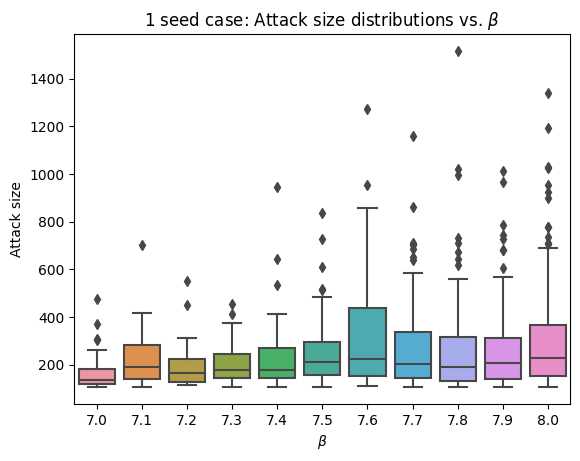

In [7]:
betas = np.linspace(7,8,11)
df_samples = {
    'beta':[],
    'samples':[]
}
for beta in betas:
    data = pd.read_csv("outputs/seed1/{}attack_samples.csv".format(beta))
    samples = list(data['0'])
    betas = [beta]*len(samples)
    df_samples['beta'] += betas
    df_samples['samples'] += samples
df_samples = pd.DataFrame(df_samples)
sns.boxplot(
    data=df_samples,
    x='beta',
    y='samples'
)
plt.title(r'1 seed case: Attack size distributions vs. $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Attack size')

Text(0, 0.5, 'Attack size')

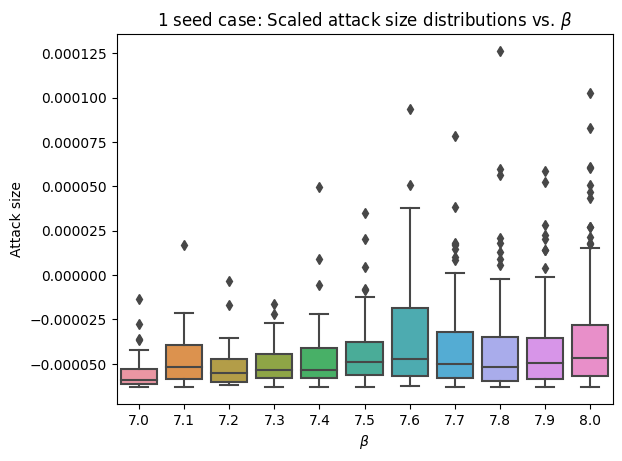

In [8]:
df_samples['scaled'] = df_samples['samples']/sim_pop - nyc_cases/nyc_population
sns.boxplot(
    data=df_samples,
    x='beta',
    y='scaled'
)
plt.title(r'1 seed case: Scaled attack size distributions vs. $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Attack size')

Text(0, 0.5, '$\\left|\\frac{med_{NYC}}{pop_{NYC}} - \\frac{med_{sim}}{pop_{sim}}\\right|$')

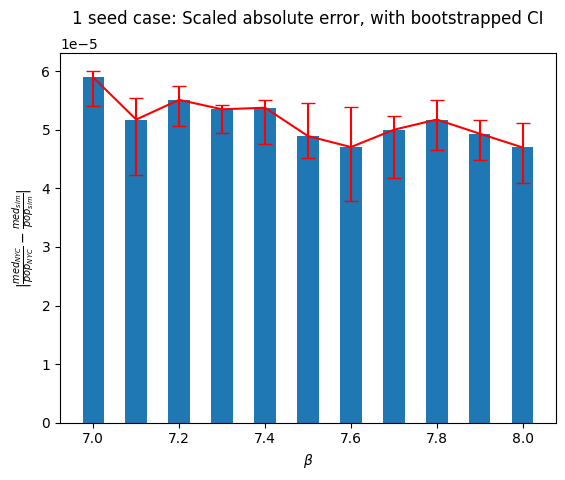

In [9]:
plt.bar(df['beta'],df['scaled_med_err'],width=0.05)
plt.errorbar(
    x=df['beta'],
    y=df['scaled_med_err'],
    yerr=(df['scaled_med_err']-df['scaled_med_err_lo'],df['scaled_med_err_hi']-df['scaled_med_err']),
    color="red",capsize=5)
plt.title('1 seed case: Scaled absolute error, with bootstrapped CI\n')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\left|\frac{med_{NYC}}{pop_{NYC}} - \frac{med_{sim}}{pop_{sim}}\right|$')

Text(0.5, 0, '$\\beta$')

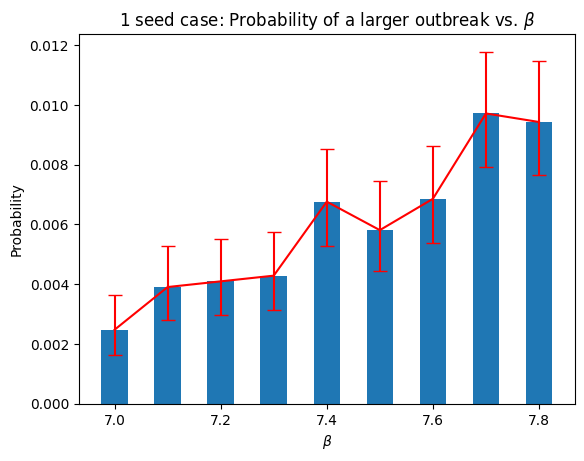

In [21]:
probs = [
    [7.0, 0.002476190476190476],
[7.1, 0.003904761904761905],
[7.2, 0.004095238095238095],
[7.3, 0.004285714285714286],
[7.4, 0.0067619047619047615],
[7.5, 0.0058095238095238096],
[7.6, 0.006857142857142857],
[7.7, 0.009714285714285713],
[7.8, 0.009428571428571429]
]
probs_seed_1= data=pd.DataFrame(probs)
intervals = [proportion_confint(round(x*10500),10500,method='beta') for x in probs_seed_1[1]]
lower_int = [i[0] for i in intervals]
higher_int = [i[1] for i in intervals]
plt.bar(probs_seed_1[0], probs_seed_1[1],width=0.05)
plt.errorbar(x=probs_seed_1[0],y=probs_seed_1[1],yerr=(probs_seed_1[1]-lower_int,higher_int-probs_seed_1[1]),color="red",capsize=5)

plt.title(r'1 seed case: Probability of a larger outbreak vs. $\beta$')
plt.ylabel('Probability')
plt.xlabel(r'$\beta$')

# Two seed cases

In [11]:
betas = np.linspace(7,8,11)
df = {
    'beta':[],
    'median':[],
    'median_lo':[],
    'median_hi':[],
    'scaled_med_err':[],
    'scaled_med_err_lo':[],
    'scaled_med_err_hi':[],
    'outbreak_prob':[]
}
for beta in betas:
    data = pd.read_csv("outputs/seed2/{}summary.csv".format(beta))
    data.index = data.iloc[:,0]
    #print(data)
    df['beta'].append(beta)
    df['median'].append(data.loc['median'][1])
    df['median_lo'].append(data.loc['median_lo'][1])
    df['median_hi'].append(data.loc['median_hi'][1])
    df['scaled_med_err'].append(data.loc['scaled_med_err'][1])
    df['scaled_med_err_lo'].append(data.loc['scaled_med_err_lo'][1])
    df['scaled_med_err_hi'].append(data.loc['scaled_med_err_hi'][1])
    df['outbreak_prob'].append(data.loc['outbreak_prob'][1])
df = pd.DataFrame(df)

Text(0, 0.5, '$\\left|\\frac{med_{NYC}}{pop_{NYC}} - \\frac{med_{sim}}{pop_{sim}}\\right|$')

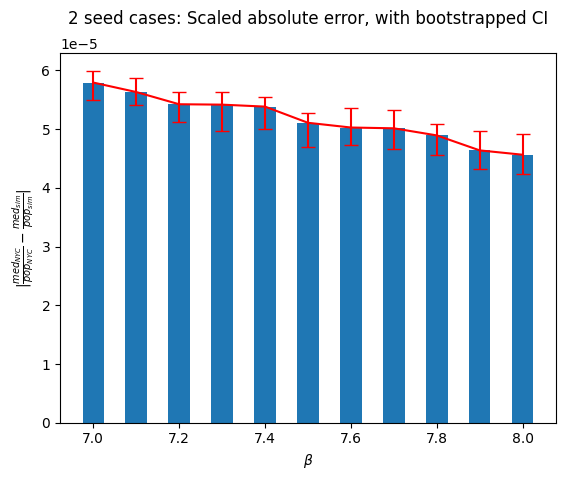

In [12]:
plt.bar(df['beta'],df['scaled_med_err'],width=0.05)
plt.errorbar(x=df['beta'],y=df['scaled_med_err'],
             yerr=(df['scaled_med_err']-df['scaled_med_err_lo'],df['scaled_med_err_hi']-df['scaled_med_err']),
             color="red",capsize=5)
plt.title('2 seed cases: Scaled absolute error, with bootstrapped CI\n')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\left|\frac{med_{NYC}}{pop_{NYC}} - \frac{med_{sim}}{pop_{sim}}\right|$')

Text(0, 0.5, 'Attack size')

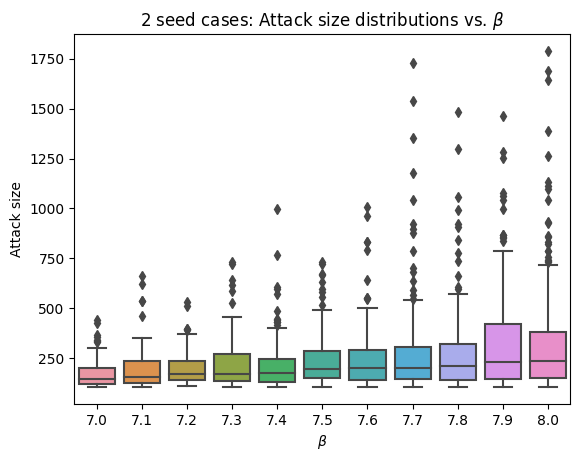

In [13]:
betas = np.linspace(7,8,11)
df_samples = {
    'beta':[],
    'samples':[]
}
for beta in betas:
    data = pd.read_csv("outputs/seed2/{}attack_samples.csv".format(beta))
    samples = list(data['0'])
    betas = [beta]*len(samples)
    df_samples['beta'] += betas
    df_samples['samples'] += samples
df_samples = pd.DataFrame(df_samples)
sns.boxplot(
    data=df_samples,
    x='beta',
    y='samples'
)
plt.title(r'2 seed cases: Attack size distributions vs. $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Attack size')

Text(0, 0.5, 'Attack size')

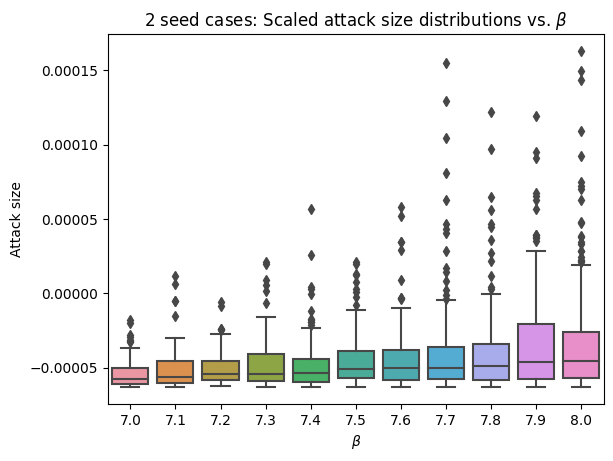

In [14]:
df_samples['scaled'] = df_samples['samples']/sim_pop - nyc_cases/nyc_population
sns.boxplot(
    data=df_samples,
    x='beta',
    y='scaled'
)
plt.title(r'2 seed cases: Scaled attack size distributions vs. $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Attack size')

Text(0.5, 0, '$\\beta$')

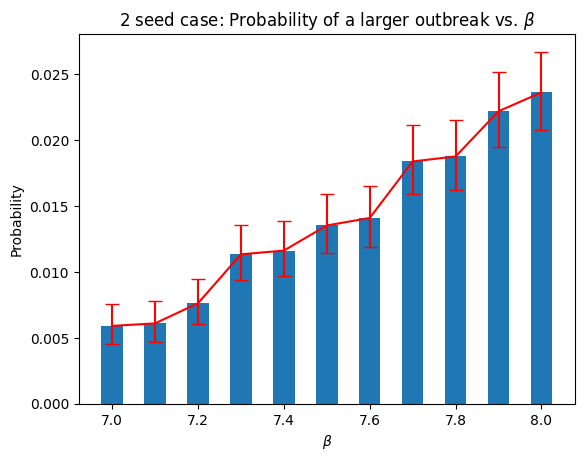

In [15]:
plt.figure()
plt.bar(df['beta'],df['outbreak_prob'],width=0.05)
intervals = [proportion_confint(round(x*10500),10500,method='beta') for x in df['outbreak_prob']]
lower_int = [i[0] for i in intervals]
higher_int = [i[1] for i in intervals]
plt.errorbar(x=df['beta'],y=df['outbreak_prob'],yerr=(df['outbreak_prob']-lower_int,higher_int-df['outbreak_prob']),color="red",capsize=5)
plt.title(r'2 seed case: Probability of a larger outbreak vs. $\beta$')
plt.ylabel('Probability')
plt.xlabel(r'$\beta$')

# Three seed cases

In [16]:
betas = np.linspace(7,8,11)
df = {
    'beta':[],
    'median':[],
    'median_lo':[],
    'median_hi':[],
    'scaled_med_err':[],
    'scaled_med_err_lo':[],
    'scaled_med_err_hi':[],
    'outbreak_prob':[]
}
for beta in betas:
    data = pd.read_csv("outputs/seed3/{}summary.csv".format(beta))
    data.index = data.iloc[:,0]
    #print(data)
    df['beta'].append(beta)
    df['median'].append(data.loc['median'][1])
    df['median_lo'].append(data.loc['median_lo'][1])
    df['median_hi'].append(data.loc['median_hi'][1])
    df['scaled_med_err'].append(data.loc['scaled_med_err'][1])
    df['scaled_med_err_lo'].append(data.loc['scaled_med_err_lo'][1])
    df['scaled_med_err_hi'].append(data.loc['scaled_med_err_hi'][1])
    df['outbreak_prob'].append(data.loc['outbreak_prob'][1])
df = pd.DataFrame(df)

Text(0, 0.5, '$\\left|\\frac{med_{NYC}}{pop_{NYC}} - \\frac{med_{sim}}{pop_{sim}}\\right|$')

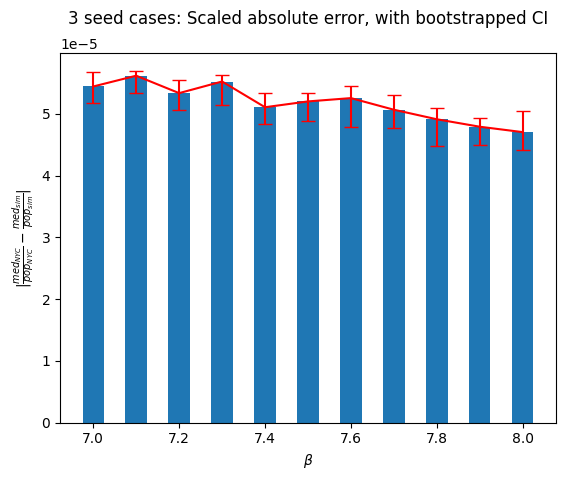

In [17]:
plt.bar(df['beta'],df['scaled_med_err'],width=0.05)
plt.errorbar(x=df['beta'],y=df['scaled_med_err'],
             yerr=(df['scaled_med_err']-df['scaled_med_err_lo'],df['scaled_med_err_hi']-df['scaled_med_err']),
             color="red",capsize=5)
plt.title('3 seed cases: Scaled absolute error, with bootstrapped CI\n')
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\left|\frac{med_{NYC}}{pop_{NYC}} - \frac{med_{sim}}{pop_{sim}}\right|$')

Text(0, 0.5, 'Attack size')

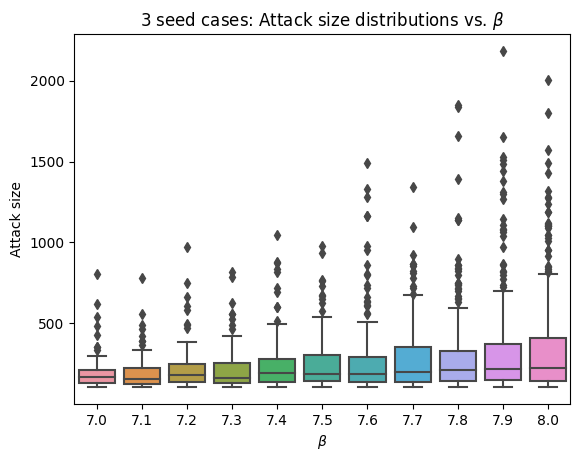

In [18]:
betas = np.linspace(7,8,11)
df_samples = {
    'beta':[],
    'samples':[]
}
for beta in betas:
    data = pd.read_csv("outputs/seed3/{}attack_samples.csv".format(beta))
    samples = list(data['0'])
    betas = [beta]*len(samples)
    df_samples['beta'] += betas
    df_samples['samples'] += samples
df_samples = pd.DataFrame(df_samples)
sns.boxplot(
    data=df_samples,
    x='beta',
    y='samples'
)
plt.title(r'3 seed cases: Attack size distributions vs. $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Attack size')

Text(0, 0.5, 'Attack size')

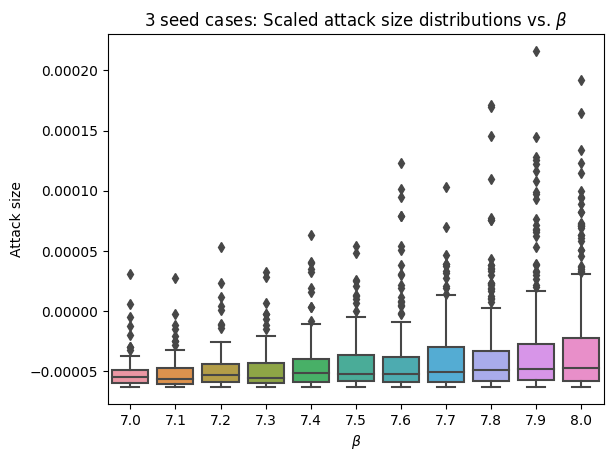

In [19]:
df_samples['scaled'] = df_samples['samples']/sim_pop - nyc_cases/nyc_population
sns.boxplot(
    data=df_samples,
    x='beta',
    y='scaled'
)
plt.title(r'3 seed cases: Scaled attack size distributions vs. $\beta$')
plt.xlabel(r'$\beta$')
plt.ylabel(r'Attack size')

Text(0.5, 0, '$\\beta$')

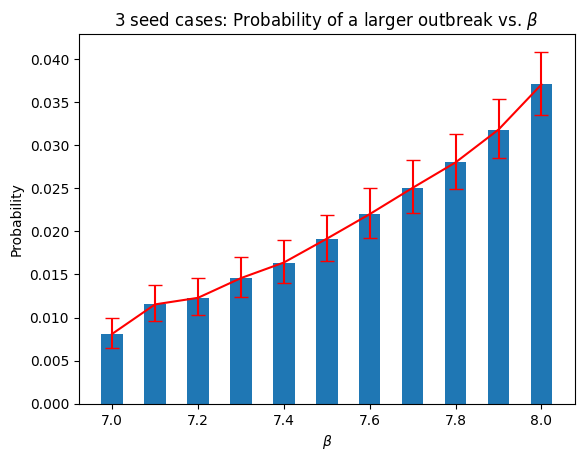

In [20]:
plt.figure()
plt.bar(df['beta'],df['outbreak_prob'],width=0.05)
intervals = [proportion_confint(round(x*10500),10500,method='beta') for x in df['outbreak_prob']]
lower_int = [i[0] for i in intervals]
higher_int = [i[1] for i in intervals]
plt.errorbar(x=df['beta'],y=df['outbreak_prob'],yerr=(df['outbreak_prob']-lower_int,higher_int-df['outbreak_prob']),color="red",capsize=5)

plt.title(r'3 seed cases: Probability of a larger outbreak vs. $\beta$')
plt.ylabel('Probability')
plt.xlabel(r'$\beta$')

# Observations and intuitions

The median of the attack size distributions isn't very sensitive to increasing $\beta$. It mostly stays the same, but the probability of very large outbreaks (~1000) increases.

As expected, the probability of outbreak increases with seeding and with $\beta$. It is not too rapid of a growth wrt $\beta$, it looks nearly linear.

My hunch is that we should set $\beta$ no higher than 7.5. Maybe 7.4? If you look at the box plots, it's also strange that 7.4 seems to have slightly higher outliers than the surrounding betas. Local maximum?

At this point: set the $\beta$ to something like that - 7.5 - and then investigate further effects via sensitivity analysis?

Why?
- Looking at the box plots and the simulations paths between 7.5 and 7.6 seems to indicate some sort of qualitative bifurcation. The ocurrence of high-attack size outliers always seems to increase quite rapidly between these two beta values.

For example, with 1 seed below:

**1 seed**

$\beta$ = 7.5 on left, $\beta$ = 7.6 on right

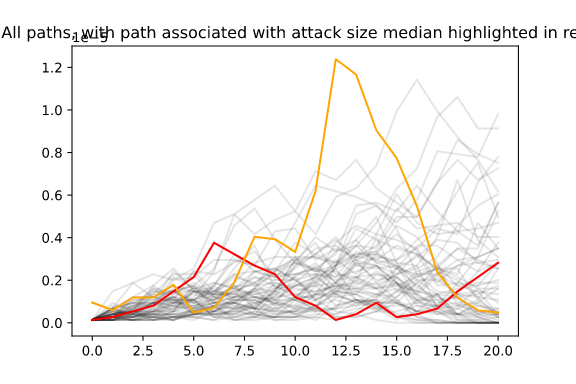 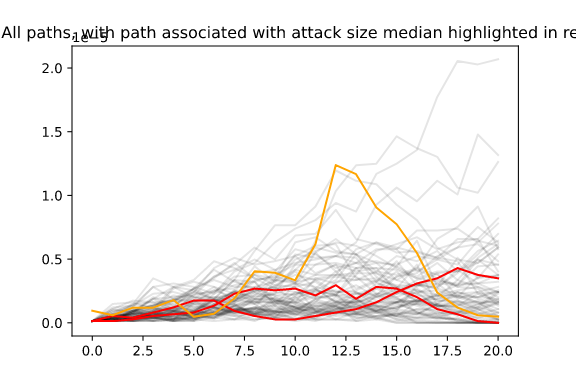

**2 seed:**

$\beta$ = 7.5 on left, $\beta$ = 7.6 on right

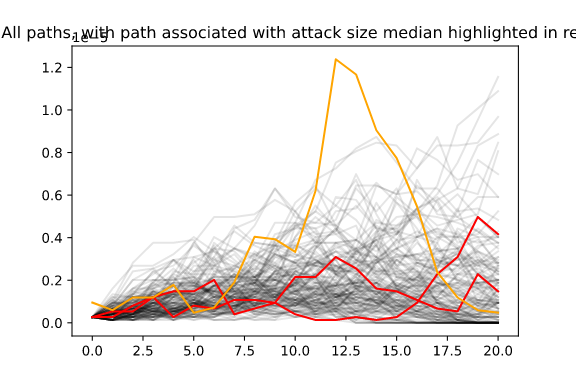 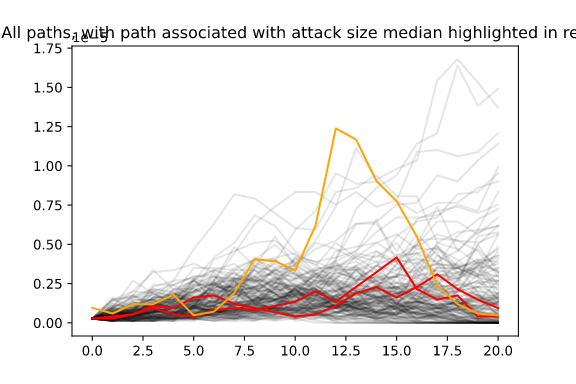

**3 seed:**

$\beta$ = 7.5 on left, $\beta$ = 7.6 on right

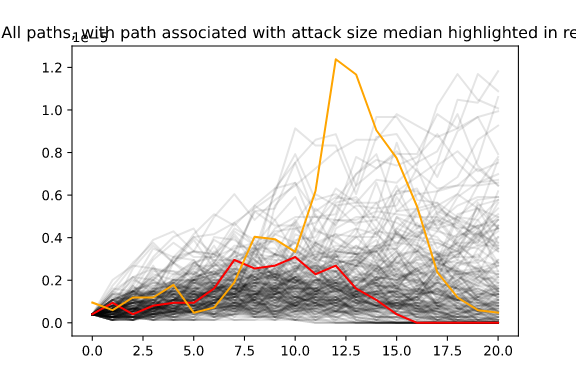 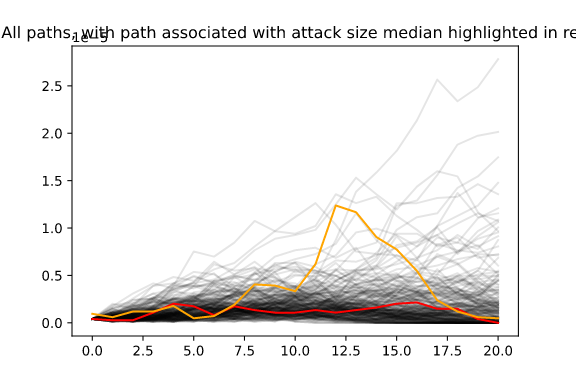


Looking at 7.4: the peaking seems to be about the right scale?

**seed 1**

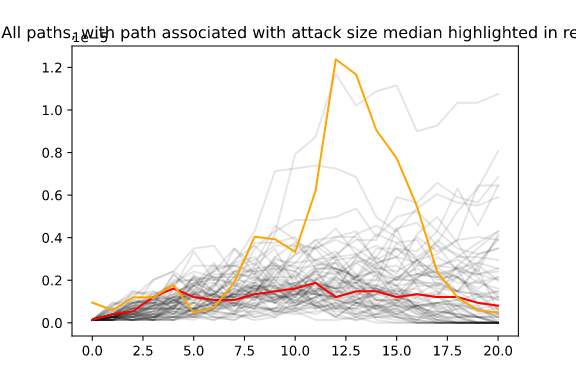

**seed 2**

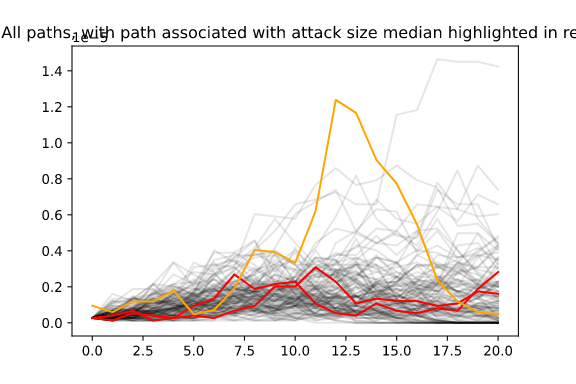

**seed 3**

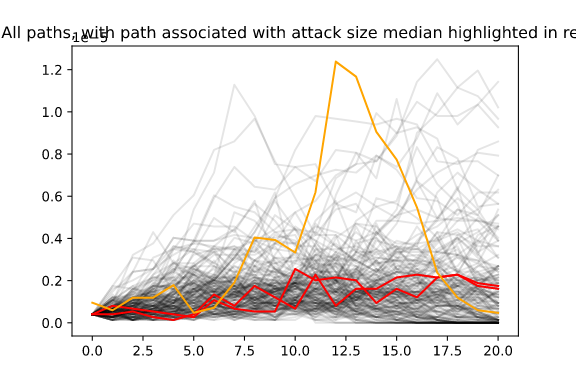